In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Since the value were unknown so i thought it to convert it to NAN
df=pd.read_csv('credit.csv',na_values=["unknown","n.a.","unemployed"])
#There were accroname assigned with the following column,so we tried to removed through those accroname

df=df.replace({'checking_balance':'[A-Za-z]','savings_balance':'[A-Za-z]','employment_duration':'[A-Za-z]'},'',regex=True)


In [2]:
#This code will tell us how many number of na are der in each column
df.isnull().sum()

checking_balance        394
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_duration      62
percent_of_income         0
years_at_residence        0
age                       0
other_credit              0
housing                   0
existing_loans_count      0
job                      22
dependents                0
phone                     0
default                   0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        606 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         817 non-null object
employment_duration     938 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     978 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [4]:
df.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0,6,critical,furniture/appliances,1169,NaN,> 7,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200,48,good,furniture/appliances,5951,< 100,1 - 4,2,2,22,none,own,1,skilled,1,no,yes
2,NaN,12,critical,education,2096,< 100,4 - 7,2,3,49,none,own,1,unskilled,2,no,no
3,< 0,42,good,furniture/appliances,7882,< 100,4 - 7,2,4,45,none,other,1,skilled,2,no,no
4,< 0,24,poor,car,4870,< 100,1 - 4,3,4,53,none,other,2,skilled,2,no,yes


In [5]:
#cleaning data with filling na with the mode value of the column
df['savings_balance'] = df['savings_balance'].fillna(df['savings_balance'].mode()[0])

In [6]:
df['checking_balance'] = df['checking_balance'].fillna(df['checking_balance'].mode()[0])

In [7]:
df['job'] = df['job'].fillna(df['job'].mode()[0])

In [8]:
df['employment_duration'] = df['employment_duration'].fillna(df['employment_duration'].mode()[0])

In [9]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [10]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

dm, ds = mean(df.months_loan_duration), std(df.months_loan_duration)
# identify outliers
cf = ds * 3
lower, upper = dm- cf, dm + cf
# identify outliers
df[(df.months_loan_duration>upper)|(df.months_loan_duration<lower)].months_loan_duration=dm


C:\Users\MANEESH\anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
dm, ds = mean(df.amount), std(df.amount)
# identify outliers
cf = ds * 3
lower, upper = dm- cf, dm + cf
# identify outliers
df[(df.amount>upper)|(df.amount<lower)].amount=dm


C:\Users\MANEESH\anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
dm, ds = mean(df.percent_of_income), std(df.percent_of_income)
# identify outliers
cf = ds * 3
lower, upper = dm- cf, dm + cf
# identify outliers
df[(df.percent_of_income>upper)|(df.percent_of_income<lower)].present_of_incom=dm



In [13]:
dm, ds = mean(df.years_at_residence), std(df.years_at_residence)
# identify outliers
cf = ds * 3
lower, upper = dm- cf, dm + cf
# identify outliers
df[(df.years_at_residence>upper)|(df.years_at_residence<lower)].year_at_residence=dm


In [14]:
dm, ds = mean(df.age), std(df.age)
# identify outliers
cf = ds * 3
lower, upper = dm- cf, dm + cf
# identify outliers
df[(df.age>upper)|(df.age<lower)].age=dm


C:\Users\MANEESH\anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


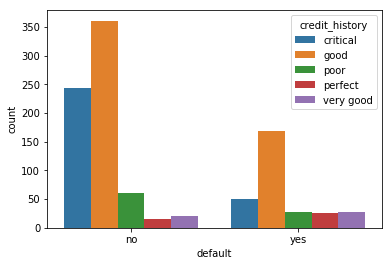

In [15]:
#Data visualisation
sns.countplot(x='default',hue='credit_history',data=df)

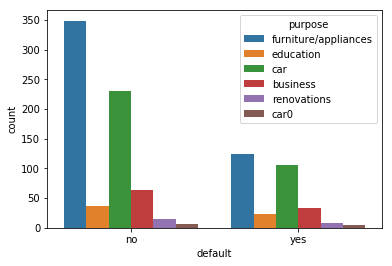

In [16]:
sns.countplot(x='default',hue='purpose',data=df)

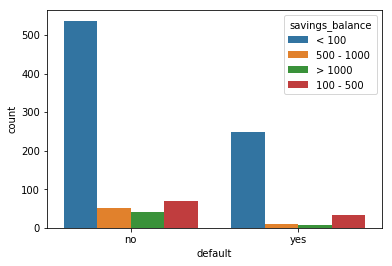

In [17]:
sns.countplot(x='default',hue='savings_balance',data=df)

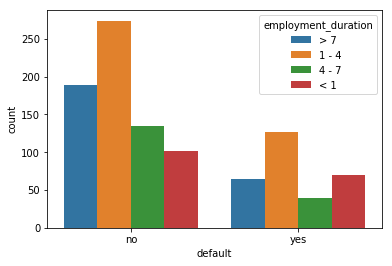

In [18]:
sns.countplot(x='default',hue='employment_duration',data=df)

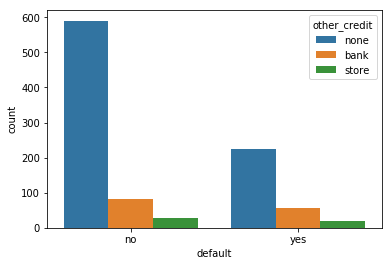

In [19]:
sns.countplot(x='default',hue='other_credit',data=df)

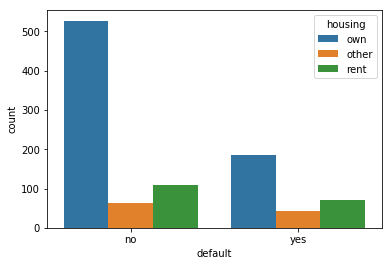

In [20]:
sns.countplot(x='default',hue='housing',data=df)

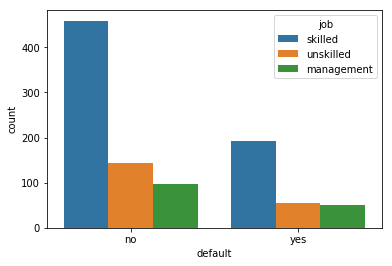

In [21]:
sns.countplot(x='default',hue='job',data=df)

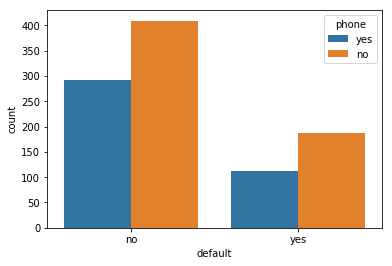

In [22]:
sns.countplot(x='default',hue='phone',data=df)

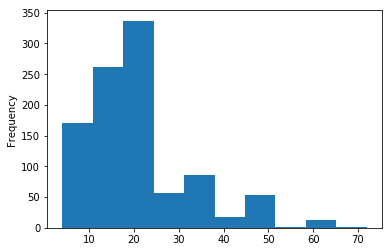

In [23]:
df['months_loan_duration'].plot.hist()

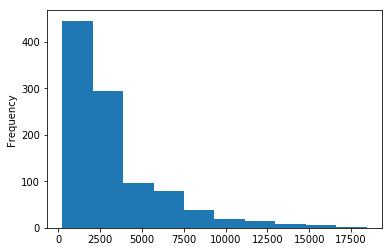

In [24]:
df['amount'].plot.hist()

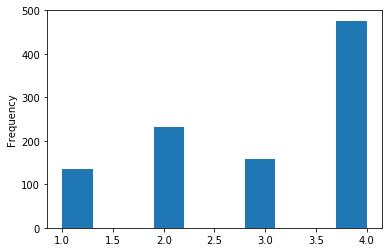

In [25]:
df['percent_of_income'].plot.hist()

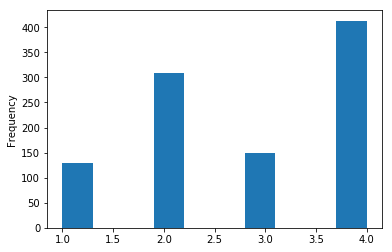

In [26]:
df['years_at_residence'].plot.hist()

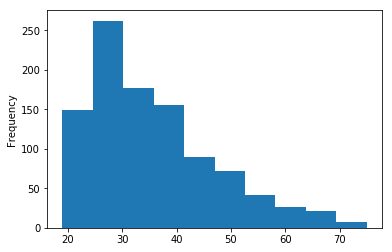

In [27]:
df['age'].plot.hist()

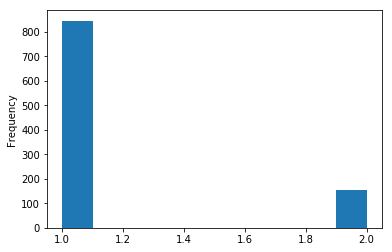

In [28]:
df['dependents'].plot.hist()

In [29]:

#Feature engineering

hu=pd.get_dummies(df.checking_balance,drop_first=True)
df=pd.concat([df,hu],axis=1)
df.drop('checking_balance',axis=1,inplace=True)
pz=pd.get_dummies(df.credit_history,drop_first=True)
df=pd.concat([df,pz],axis=1)
df.drop('credit_history',axis=1,inplace=True)
go=pd.get_dummies(df.savings_balance,drop_first=True)
df=pd.concat([df,go],axis=1)
df.drop('savings_balance',axis=1,inplace=True)
dt=pd.get_dummies(df.employment_duration,drop_first=True)
df=pd.concat([df,dt],axis=1)
df.drop('employment_duration',axis=1,inplace=True)
lm=pd.get_dummies(df.other_credit,drop_first=True)
df=pd.concat([df,lm],axis=1)
df.drop('other_credit',axis=1,inplace=True)
el=pd.get_dummies(df.housing,drop_first=True)
df=pd.concat([df,el],axis=1)
df.drop('housing',axis=1,inplace=True)
ct=pd.get_dummies(df.job,drop_first=True)
df=pd.concat([df,ct],axis=1)
df.drop('job',axis=1,inplace=True)
ai=pd.get_dummies(df.phone,drop_first=True)
df=pd.concat([df,ai],axis=1)
df.drop('phone',axis=1,inplace=True)
df=df.drop('purpose',axis=1)
df=df.drop('perfect',axis=1)
df=df.drop('poor',axis=1)

#df=df.drop('very good',axis=1)

df=df.drop('store',axis=1)

#df=df.drop('perfect',axis=1)
#df=df.drop('poor',axis=1)

df=df.drop('very good',axis=1)

#df=df.drop('store',axis=1)


d={'no':False,'yes':True}
df['default']=df['default'].map(d)


In [30]:
#label encoding and feature encoding
x=df.drop('default',axis=1)
y=df['default']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
#building model
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
months_loan_duration    1000 non-null int64
amount                  1000 non-null int64
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
existing_loans_count    1000 non-null int64
dependents              1000 non-null int64
< 0                     1000 non-null uint8
> 200                   1000 non-null uint8
good                    1000 non-null uint8
500 - 1000              1000 non-null uint8
< 100                   1000 non-null uint8
> 1000                  1000 non-null uint8
4 - 7                   1000 non-null uint8
< 1                     1000 non-null uint8
> 7                     1000 non-null uint8
none                    1000 non-null uint8
own                     1000 non-null uint8
rent                    1000 non-null uint8
skilled                 1000 non-null uint8
unskilled     

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.706
Mean accuracy score: 0.733


In [33]:

headers = ["name", "score"]


values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1] * -1)
print(values, headers)



[('amount', 0.1962389984523098), ('age', 0.1568328623898928), ('months_loan_duration', 0.13916057447543465), ('percent_of_income', 0.05896122264732888), ('years_at_residence', 0.058709489145843605), ('existing_loans_count', 0.03657438597195505), ('yes', 0.03445584791763537), ('own', 0.030664531811534234), ('< 0 ', 0.03043231104862762), ('good', 0.02838339347665877), ('none', 0.027822834760644108), ('< 1 ', 0.02694398970700199), ('skilled', 0.025253656158038713), ('> 7 ', 0.0227713028648838), ('< 100 ', 0.02160378018879388), ('4 - 7 ', 0.021259452395492744), ('dependents', 0.02005711875874632), ('unskilled', 0.018433137863448964), ('rent', 0.016309117808309324), ('> 200 ', 0.011830868030809131), ('500 - 1000 ', 0.010089228111970747), ('> 1000 ', 0.007211896014639588)] ['name', 'score']


In [34]:
import numpy 
from numpy import arange 
from matplotlib import pyplot 
from pandas import read_csv 
from pandas import set_option 
from pandas.tools.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
# Test option and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [35]:
# Spot-Check Algorithms 
models = []
models.append(('LR', LogisticRegression()))
models.append(('ntAnaLDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [36]:
results = [] 
names = [] 
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.720896 (0.049072)
ntAnaLDA: 0.717910 (0.047410)
KNN: 0.671642 (0.045760)
CART: 0.631343 (0.061194)
NB: 0.652239 (0.065075)
SVM: 0.702985 (0.053169)


LR = LogisticRegression
ntAnaLDA = LinearDiscriminalysis
KNN = KNeighborsClassifier
CART = DecisionTreeClassifier
NB = GaussianNB
'SVM = SVC


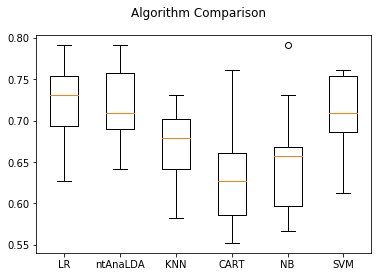

In [37]:
# Compare Algorithms
print("LR = LogisticRegression")
print("ntAnaLDA = LinearDiscriminalysis")
print("KNN = KNeighborsClassifier")
print("CART = DecisionTreeClassifier")
print("NB = GaussianNB")
print("'SVM = SVC")
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111)
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()
